In [ ]:
!pip install shapely
!pip install fiona
!pip install pyproj
!pip install rtree
!pip install geopandas
!pip install geoplot

     |████████████████████████████████| 15.3MB 248kB/s 
     |████████████████████████████████| 6.6MB 5.2MB/s 
     |████████████████████████████████| 1.0MB 5.1MB/s 
     |████████████████████████████████| 1.0MB 5.2MB/s 
     |████████████████████████████████| 12.1MB 8.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 225kB 36.0MB/s 
     |████████████████████████████████| 19.1MB 1.2MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516162 sha256=eee7819ab954449aef9a98011050804c7312722cfb9a19d5c848f30237c4dfa5
  Stored in directory: /root/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
Successfully built cartopy
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37264 sha256=0ccf4d5f6dc15baf150f49eb9958fcadf296b3464dd36ff5ad03e54107f4bc76
  Stored in directory: /root/

In [4]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import pandas as pd
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
%matplotlib inline
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
map_indo = gpd.read_file("drive/My Drive/visdat/INDONESIA_PROP.shp")
map_indo.head()

,ID,kode,Propinsi,SUMBER,geometry
0,1,85,IRIAN JAYA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((137.16585 -3.17501 0.00000, ..."
1,2,52,NUSATENGGARA BARAT,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((117.62720 -8.50640 0.00000, ..."
2,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1..."
3,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ..."
4,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01..."


In [22]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Uninstalling Shapely-1.7.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.7.1-py3.7.egg-info
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.7.1
  Using cached https://files.pythonhosted.org/packages/42/f3/0e1bc2c4f15e05e30c6b99322b9ddaa2babb3f43bc7df2698efdc1553439/Shapely-1.7.1.tar.gz
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
    Running setup.py install for shapely ... done


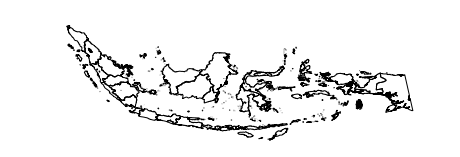

In [23]:
gplt.polyplot(map_indo, projection=gcrs.AlbersEqualArea())

In [18]:
covid_indo = pd.read_csv("drive/My Drive/visdat/Indonesia_coronavirus_daily_data.csv") 
covid_indo.head()

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,01/03/2020,DKI JAKARTA,2,0,0,2,2,0,0,2
1,02/03/2020,DKI JAKARTA,2,0,0,2,4,0,0,4
2,03/03/2020,DKI JAKARTA,2,0,0,2,6,0,0,6
3,04/03/2020,DKI JAKARTA,2,0,0,2,8,0,0,8
4,05/03/2020,DKI JAKARTA,0,1,0,-1,8,0,1,7


In [19]:
covid_1may = covid_indo["Date"] == "01/05/2021"
covid_1may.head()

0    False
1    False
2    False
3    False
4    False
Name: Date, dtype: bool

In [20]:
cvd_indo = map_indo.merge(covid_indo[covid_1may], left_on="Propinsi", right_on="Province")
cvd_indo.head()

,ID,kode,Propinsi,SUMBER,geometry,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,3,75,GORONTALO,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((122.18814 1.04530 0.00000, 1...",01/05/2021,GORONTALO,6,4,49,-47,5400,5080,165,155
1,4,74,SULAWESI TENGGARA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((120.98423 -2.83534 0.00000, ...",01/05/2021,SULAWESI TENGGARA,7,1,1,5,10427,9886,210,331
2,5,34,DAERAH ISTIMEWA YOGYAKARTA,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"POLYGON Z ((110.01183 -7.88690 0.00000, 110.01...",01/05/2021,DAERAH ISTIMEWA YOGYAKARTA,128,4,330,-206,39644,34737,960,3947
3,6,3329,JAWA TENGAH,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((108.82934 -6.74608 0.00000, ...",01/05/2021,JAWA TENGAH,198,20,237,-59,184441,165923,8218,10300
4,8,35,JAWA TIMUR,Peta Dasar BAKOSURTANAL Skala 1 : 250.000,"MULTIPOLYGON Z (((110.89835 -8.17206 0.00000, ...",01/05/2021,JAWA TIMUR,231,21,202,8,147977,135071,10678,2228


Text(0.5, 1.0, 'sebaran kasus positif covid19 di Indonesia pada tanggal 1 Mei 2021')

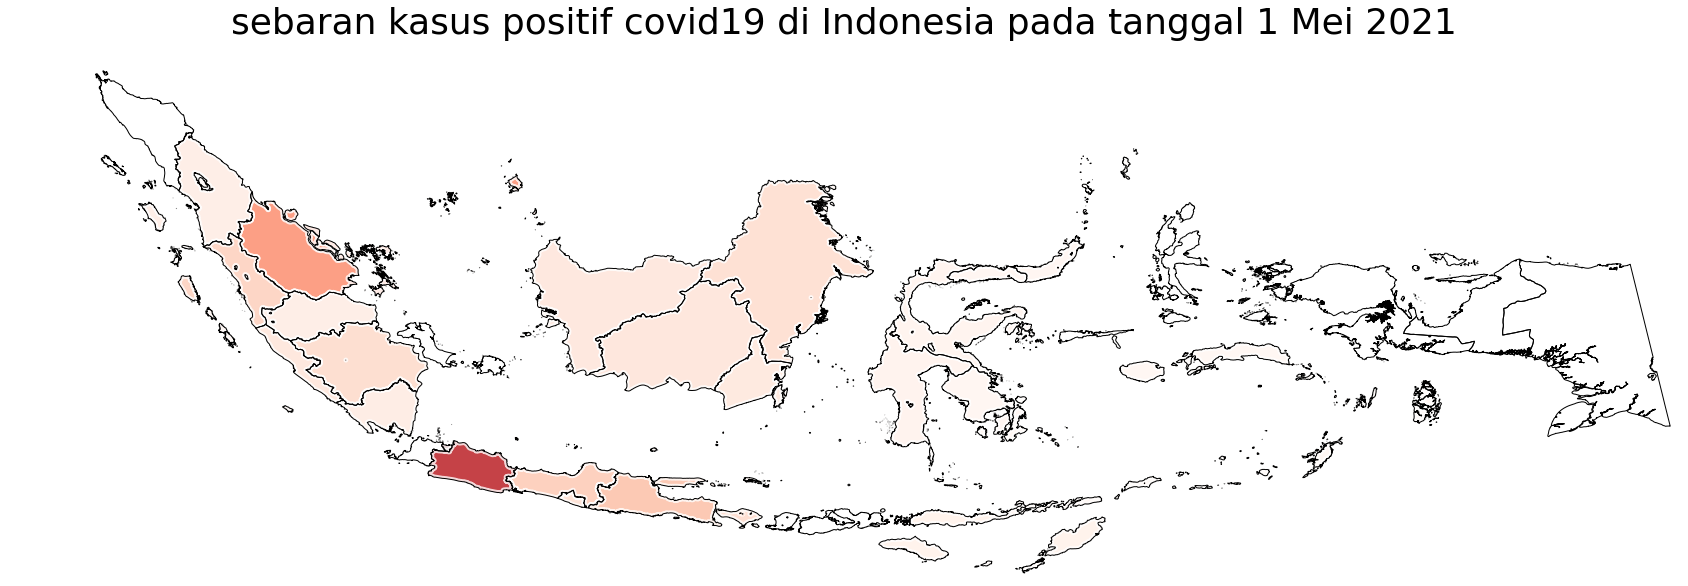

In [21]:
ax = gplt.choropleth(
    cvd_indo,
    hue="Daily_Case",
    edgecolor="white",
    linewidth=5,
    cmap="Reds",
    alpha = 0.8,
    projection=gcrs.AlbersEqualArea(),
    figsize=(30, 30)
)

gplt.polyplot(
    map_indo,
    ax=ax,
    extent=indo.total_bounds,
    edgecolor="black",
    linewidth=1,
    zorder=1
)

ax.set_title(
    "sebaran kasus positif covid19 di Indonesia pada tanggal 1 Mei 2021",
    fontsize=36
)